## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,ConfusionMatrixDisplay,recall_score
from scipy.stats.mstats import winsorize

## Reading the Dataset

In [2]:
df= pd.read_csv(r"C:\Users\Shashikanth\Downloads\Brain-tumor-detection.csv")

In [3]:
df

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1
...,...,...,...,...,...,...,...,...,...,...
236,236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,(1.2328363649866522e-16+2.0133745759920343j),0
237,237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,(1.1025778731209189e-16+1.80064631514748j),0
238,238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,(1.815595306633918e-17+0.29650921521176654j),0
239,239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,(1.2673089388466744e-17+0.20696725614749073j),0


### Droping the Unnecessary columns

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.isna().sum()

Area                   0
Perimeter              0
Convex Area            0
Solidity               0
Equivalent Diameter    0
Major Axis             0
Minor Axis             0
Eccentricity           0
Class                  0
dtype: int64

In [6]:
df.duplicated().sum()

51

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 240
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 190 non-null    float64
 1   Perimeter            190 non-null    float64
 2   Convex Area          190 non-null    float64
 3   Solidity             190 non-null    float64
 4   Equivalent Diameter  190 non-null    float64
 5   Major Axis           190 non-null    float64
 6   Minor Axis           190 non-null    float64
 7   Eccentricity         190 non-null    object 
 8   Class                190 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 14.8+ KB


In [10]:
def comp_eccentric(x):
    if x.isnumeric()==True:
        return abs(complex(x))
    else:
        return abs(complex(x[1:-1]))

In [11]:
df['Eccentricity'] = df['Eccentricity'].apply(comp_eccentric)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 240
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 190 non-null    float64
 1   Perimeter            190 non-null    float64
 2   Convex Area          190 non-null    float64
 3   Solidity             190 non-null    float64
 4   Equivalent Diameter  190 non-null    float64
 5   Major Axis           190 non-null    float64
 6   Minor Axis           190 non-null    float64
 7   Eccentricity         190 non-null    float64
 8   Class                190 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 14.8 KB


In [13]:
df["Class"].unique()

array([1, 0], dtype=int64)

In [14]:
td = {1:'Tumor Detected',0:'Tumor Not Detected'}
df['Class']=df['Class'].map(td)

### Removing the Outliers

In [15]:
df = df.apply(lambda x: np.log(x) if np.issubdtype(x.dtype, np.number) else x)

#Replace infinity values with the mean of each column
for col in df.select_dtypes(include=[np.number]):
    col_mean = df[col][~np.isinf(df[col])].mean()
    df[col].replace(np.inf, col_mean, inplace=True)  # Replacing positive infinity
    df[col].replace(-np.inf, col_mean, inplace=True)  # Replacing negative infinity
winsorization_factor = 0.05  # You can adjust this value based on your data and requirements

In [16]:
#Apply winsorization to all numeric columns
for col in df.select_dtypes(include=[np.number]):
    df[col] = winsorize(df[col], limits=(winsorization_factor, winsorization_factor))

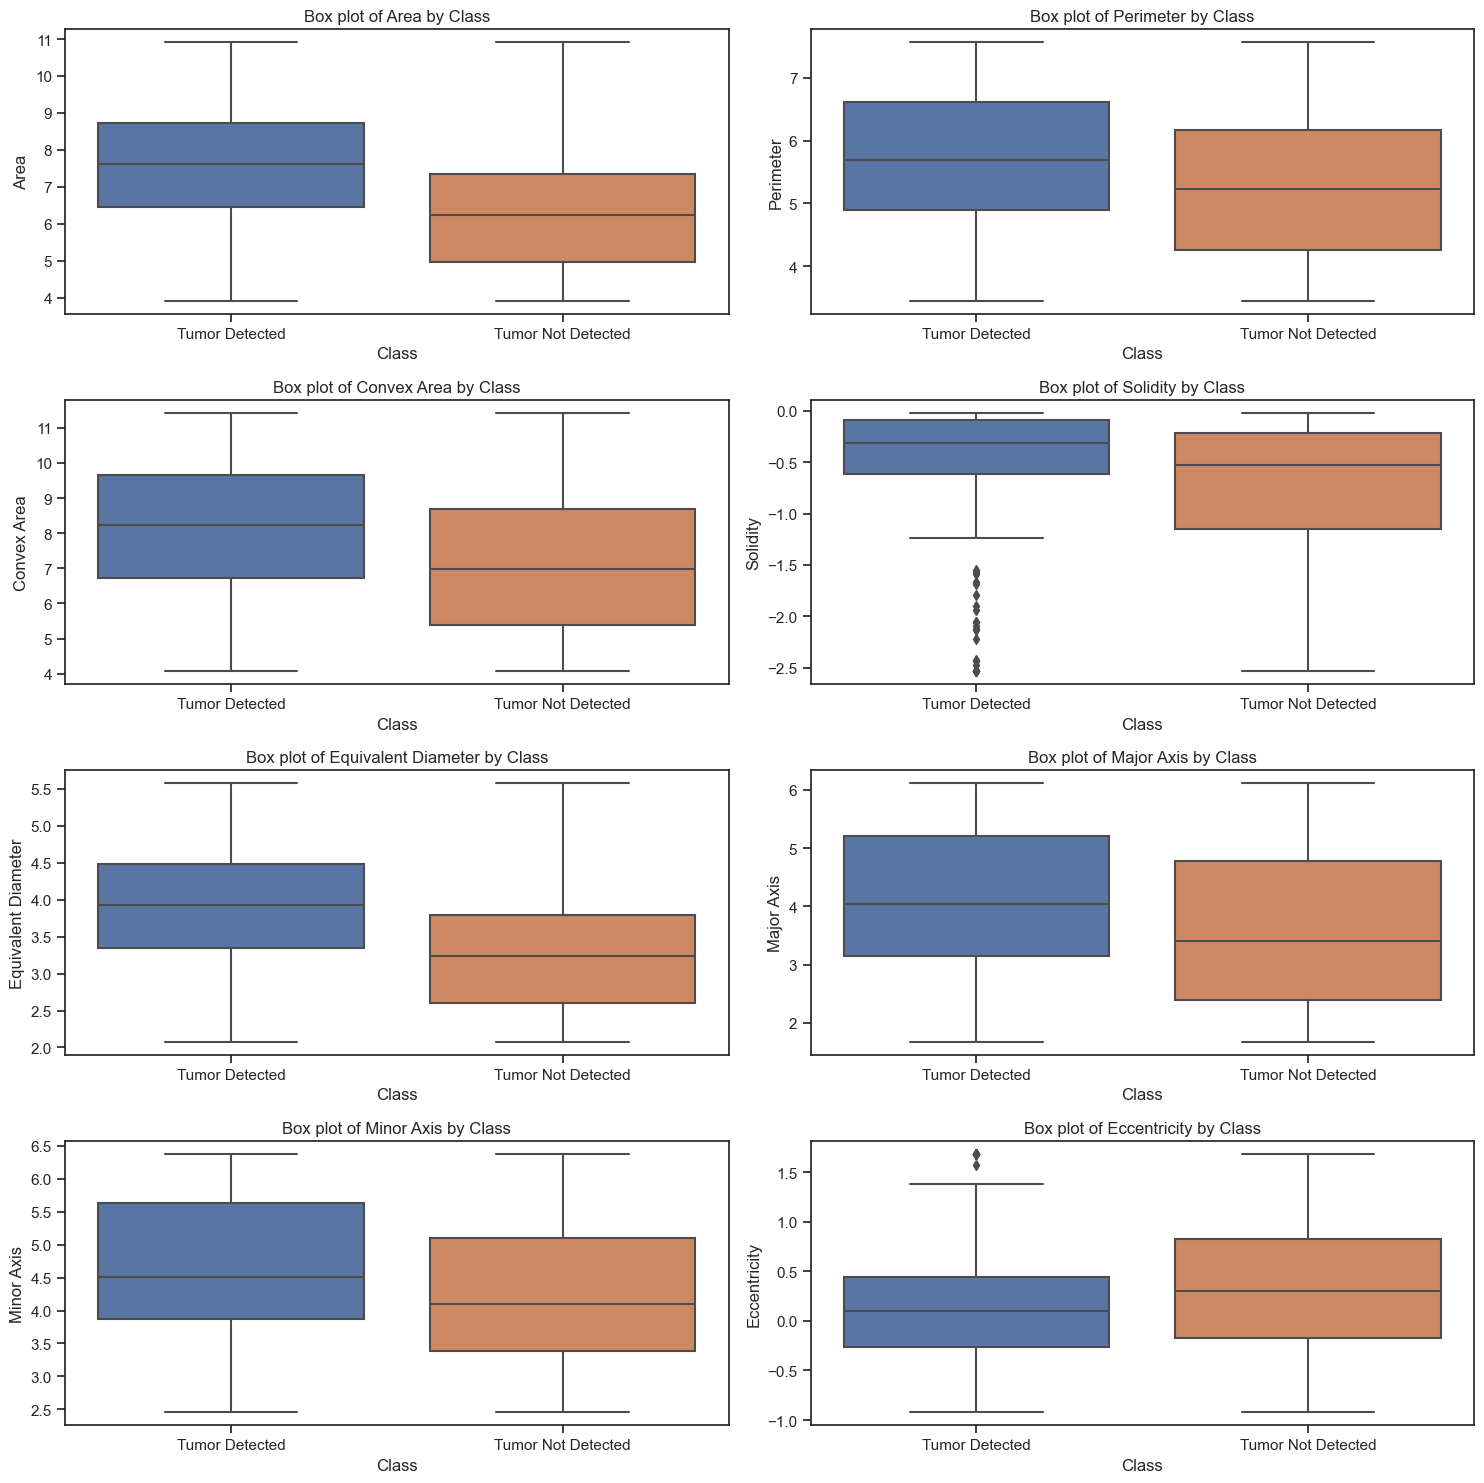

In [17]:
sns.set(style="ticks")

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

axes = axes.flatten()

features = ['Area', 'Perimeter', 'Convex Area', 'Solidity', 'Equivalent Diameter', 'Major Axis', 'Minor Axis', 'Eccentricity']

for i, j in enumerate(features):
    sns.boxplot(x='Class', y=j, data=df, ax=axes[i])
    axes[i].set_title(f'Box plot of {j} by Class')

plt.tight_layout()
plt.show()

In [18]:
for i in df.columns:
    print(df[i].unique())
    print("*"*100)

[ 8.75060386 10.87382129 10.82441751  8.40871672  4.97673374  8.46957734
 10.37533323 10.90978351  8.3244576   9.46598983  9.1630391   8.7042535
  5.97888576  8.00903069  7.05660623  7.65491705  8.76459999  6.67329797
  9.16392987  9.4363199   7.07918439  8.10000969  9.17988116  8.80282316
  8.39276311  6.71840911  5.44673737  7.95822719  6.83518459  9.24522477
  6.40770473  6.56596895  7.66411197  6.5978276   5.90263333  7.35596054
  7.18954503  6.07878838  6.4707995   9.57341976  4.11087386  8.28689914
  5.68187764  7.27066077  4.89034913  3.91202301  7.52429136  4.40060302
  7.18369903  4.39444915  5.46171091  7.96779997  8.33158624  8.95525456
  7.23381636  5.72684775  8.48601207  8.4981123   7.17472431  7.92189841
  7.46765674  7.23741867  8.29304914  7.47250074  5.87493073  6.6147256
  8.54578065  6.49526556  5.0271646   7.58984151  6.1559191   7.38678059
  9.86167548  8.77469952  5.57972983  4.57471098  8.22443157  8.05896002
  8.72127624  8.71653573  6.37246618  7.00669523  7.1

In [19]:
df

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,8.750604,6.257615,9.195785,-0.445181,4.496084,4.457801,4.990112,0.320859,Tumor Detected
1,10.873821,7.081558,11.001216,-0.127395,5.557693,5.345154,6.006012,0.505772,Tumor Detected
2,10.824418,7.255132,11.150929,-0.326512,5.532991,5.410005,5.921787,0.289175,Tumor Detected
3,8.408717,5.619032,8.464109,-0.055392,4.325141,4.171589,4.533496,0.030210,Tumor Detected
4,4.976734,4.522693,5.779199,-0.802465,2.609149,2.827371,3.364362,0.327985,Tumor Detected
...,...,...,...,...,...,...,...,...,...
236,6.301703,5.338821,7.183491,-0.881788,3.271634,3.363927,4.173985,0.699812,Tumor Not Detected
237,6.804615,5.447455,7.275519,-0.470904,3.523089,3.419336,4.141892,0.588146,Tumor Not Detected
238,8.063693,5.383032,8.089482,-0.025790,4.152629,4.151169,4.193302,-0.922065,Tumor Not Detected
239,8.716536,7.097244,10.844656,-2.128121,4.479050,5.634790,5.655761,-0.922065,Tumor Not Detected


In [20]:
df.describe()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,7.176938,5.561430,7.842749,-0.660075,3.709251,3.919677,4.474058,0.209556
std,1.883742,1.165391,2.171456,0.758817,0.941871,1.318409,1.103785,0.668694
min,3.912023,3.451775,4.069027,-2.536052,2.076794,1.674544,2.453542,-0.922065
25%,5.881856,4.768815,6.329989,-0.808225,3.061710,2.900388,3.680131,-0.236746
50%,7.179212,5.555070,7.857719,-0.364635,3.710388,3.874259,4.392449,0.129125
75%,8.442869,6.402505,9.247521,-0.103447,4.342217,5.067679,5.459780,0.584195
max,10.909784,7.560713,11.427689,-0.020229,5.575674,6.112523,6.379911,1.684010


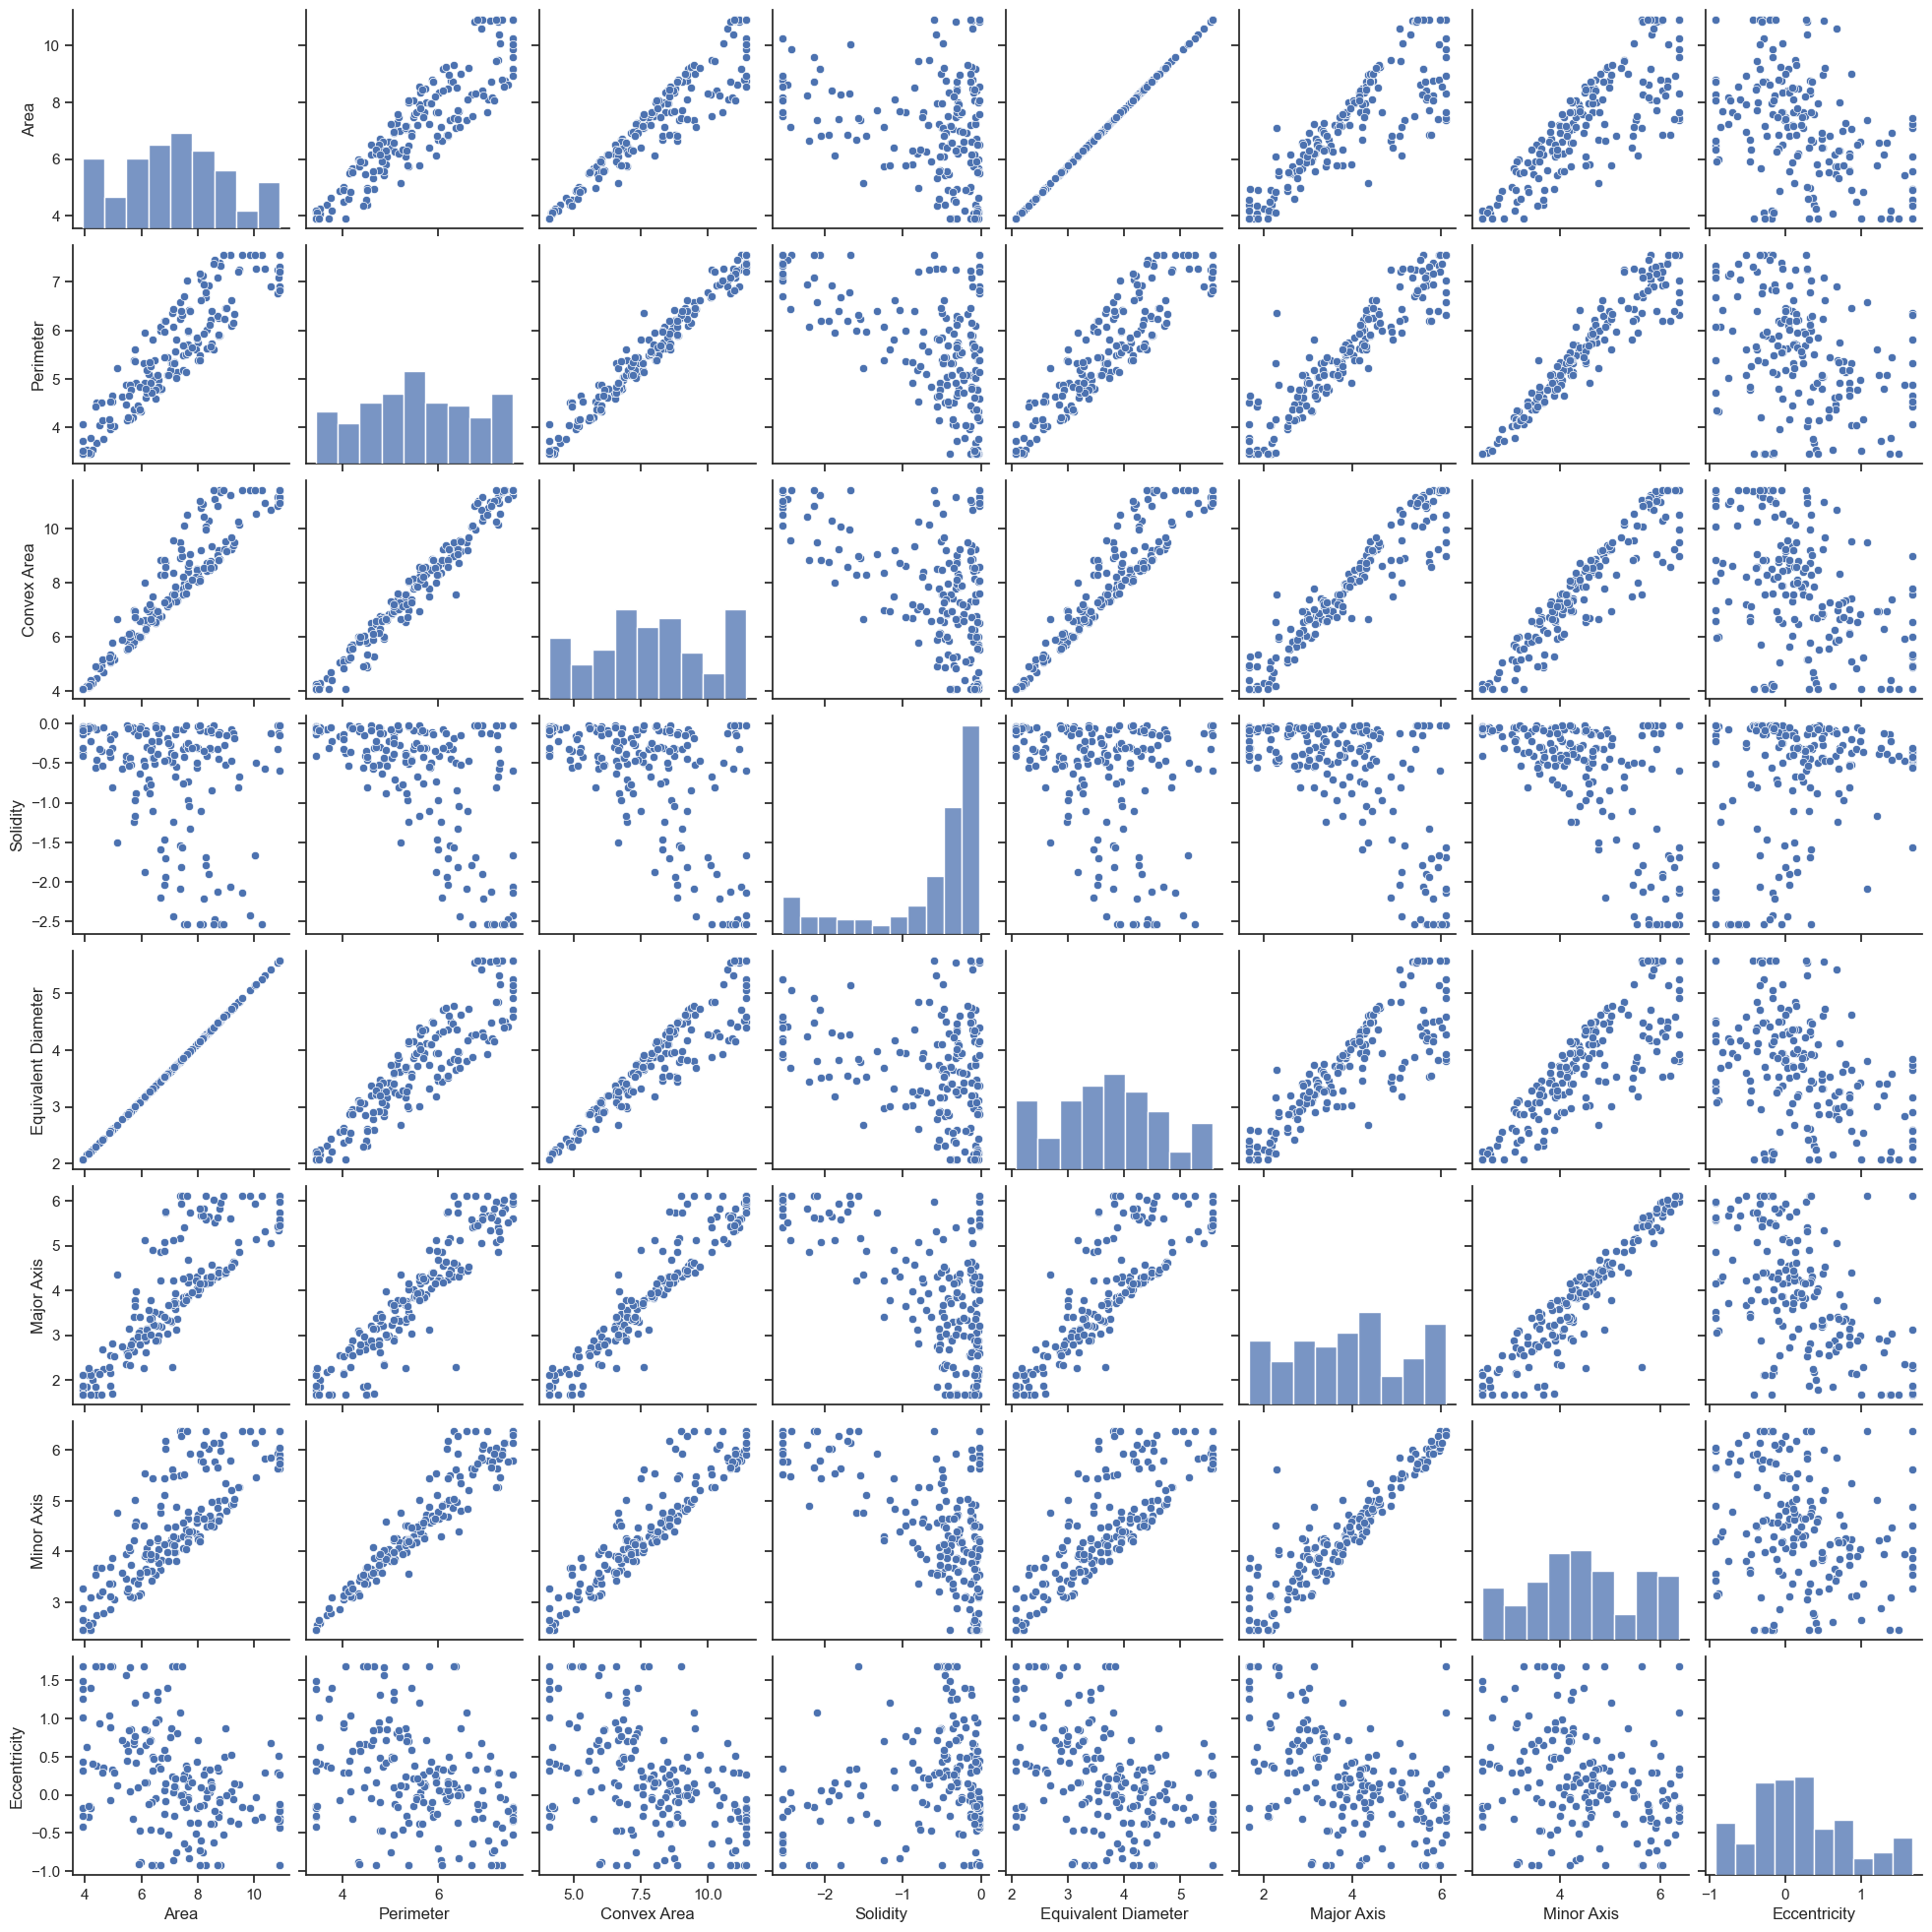

In [21]:
sns.pairplot(data=df)

In [22]:
df.corr()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity
Area,1.000000,0.902183,0.941324,-0.203374,1.000000,0.848475,0.828856,-0.427823
Perimeter,0.902183,1.000000,0.983880,-0.570558,0.902183,0.933681,0.960109,-0.380028
Convex Area,0.941324,0.983880,1.000000,-0.514776,0.941324,0.951974,0.937660,-0.463161
Solidity,-0.203374,-0.570558,-0.514776,1.000000,-0.203374,-0.608724,-0.620477,0.241549
Equivalent Diameter,1.000000,0.902183,0.941324,-0.203374,1.000000,0.848475,0.828856,-0.427823
Major Axis,0.848475,0.933681,0.951974,-0.608724,0.848475,1.000000,0.936111,-0.538305
Minor Axis,0.828856,0.960109,0.937660,-0.620477,0.828856,0.936111,1.000000,-0.262020
Eccentricity,-0.427823,-0.380028,-0.463161,0.241549,-0.427823,-0.538305,-0.262020,1.000000


<Axes: >

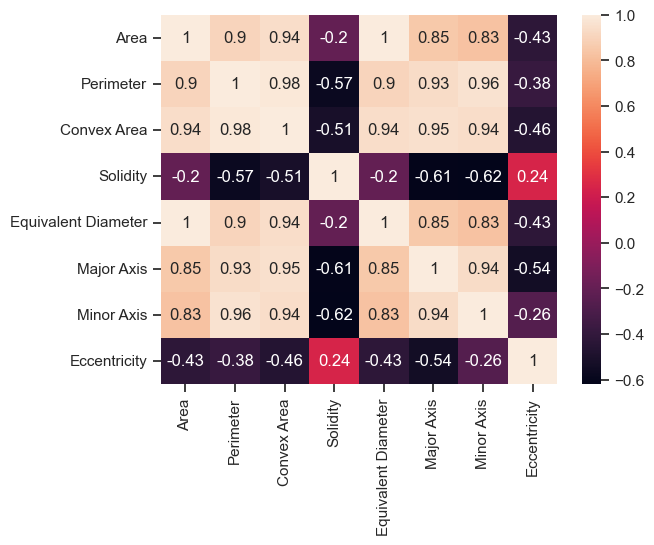

In [23]:
sns.heatmap(data=df.corr(),annot=True)

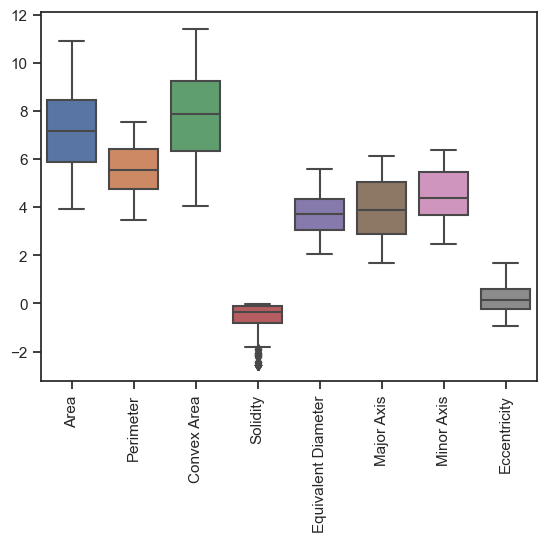

In [24]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [25]:
df.var()

Area                   3.548483
Perimeter              1.358137
Convex Area            4.715220
Solidity               0.575803
Equivalent Diameter    0.887121
Major Axis             1.738202
Minor Axis             1.218342
Eccentricity           0.447152
dtype: float64

In [27]:
X=df.drop('Class',axis=1)
y=df['Class']

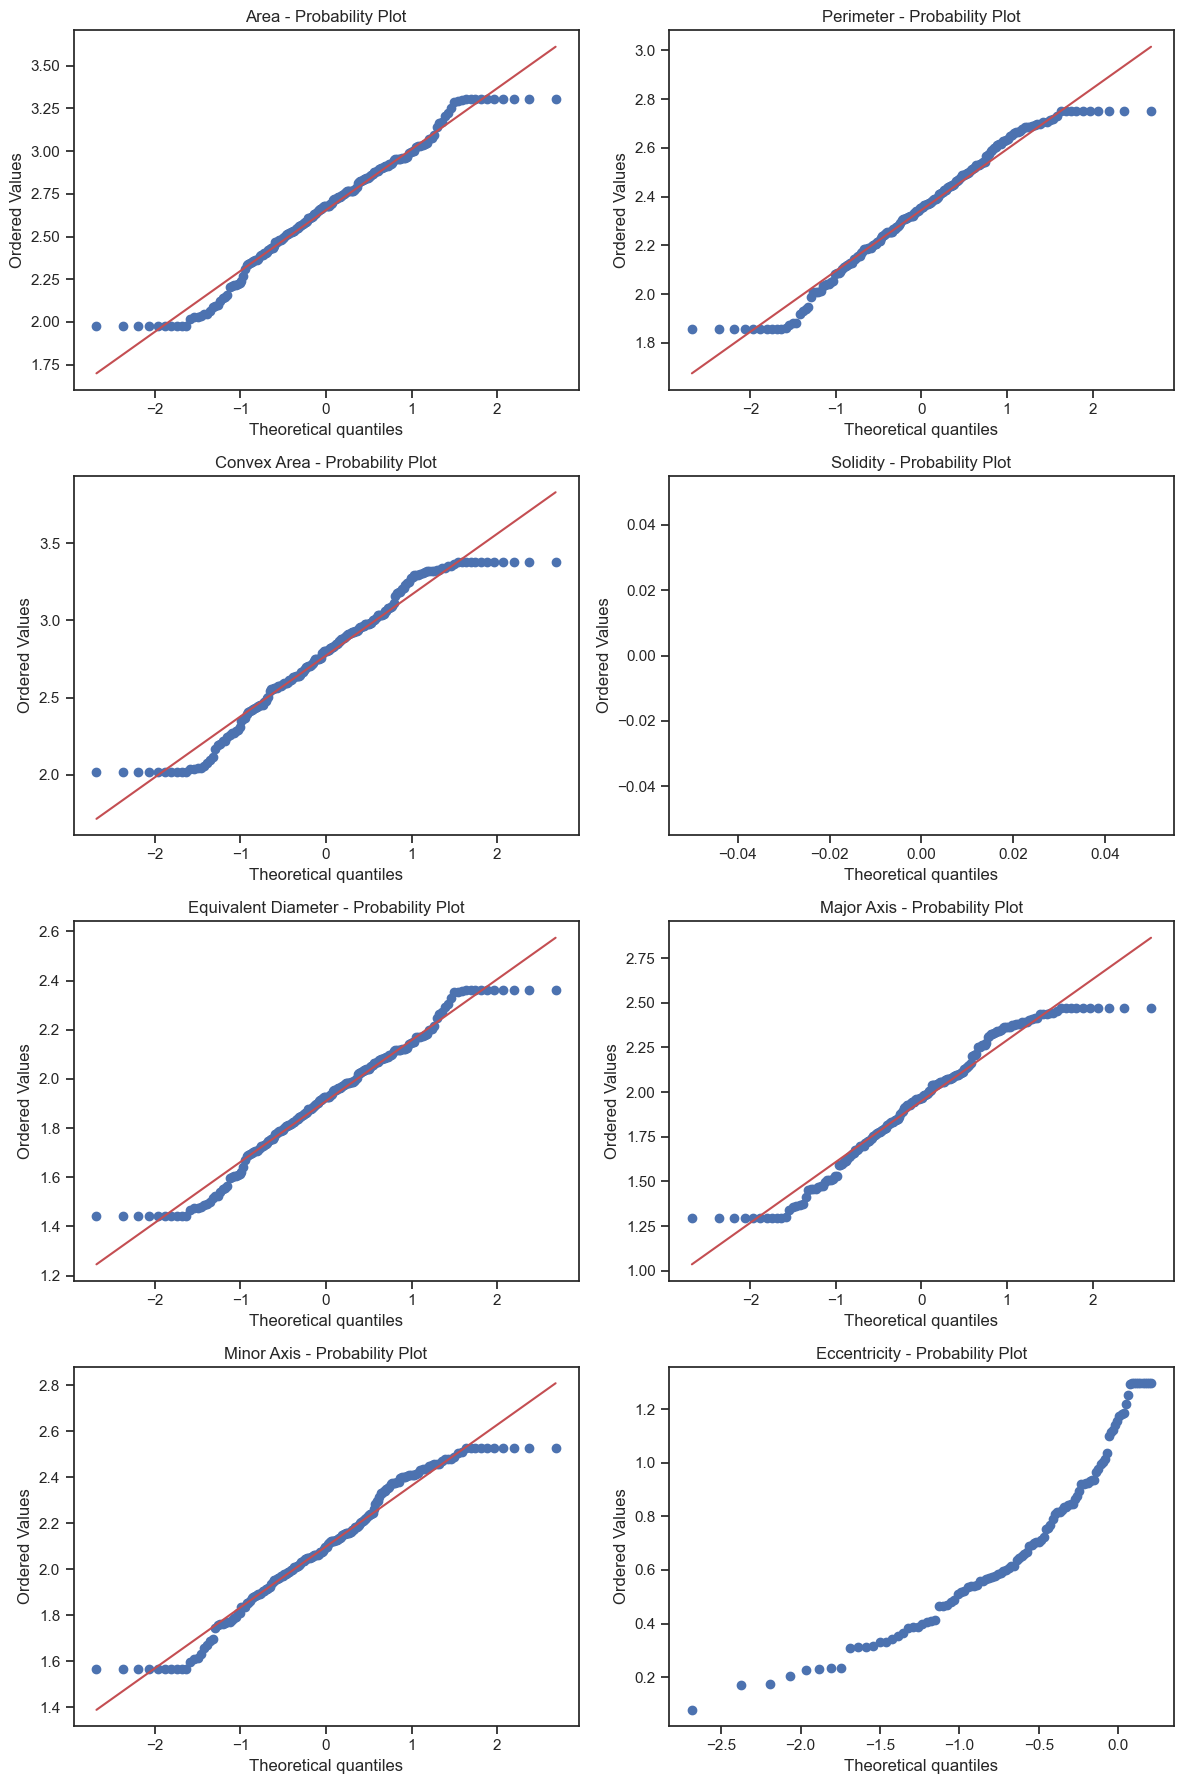

In [28]:
import scipy.stats as stats

n_rows = 4
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 18))

for i, column in enumerate(list(X.columns)):
    stats.probplot(np.sqrt(X[column]), dist="norm", plot=axes[i // n_cols, i % n_cols])
    axes[i // n_cols, i % n_cols].set_title(f'{column} - Probability Plot')

plt.tight_layout()
plt.show()

## Model Building

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=75)

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from feature_engine.outliers import Winsorizer

class WinsorizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, tail='both', fold=1):
        self.tail = tail
        self.fold = fold

    def fit(self, X, y=None):
        self.winsorizers = {}
        for col in X.columns:
            self.winsorizers[col] = Winsorizer(
                capping_method='mad',
                tail=self.tail,
                fold=self.fold
            )
            self.winsorizers[col].fit(X[[col]])
        return self

    def transform(self, X):
        X_transformed = pd.DataFrame(index=X.index)
        for col, winsorizer in self.winsorizers.items():
            X_transformed[col] = winsorizer.transform(X[[col]]).squeeze()
        return X_transformed
# Define the pipeline
pipeline = Pipeline(steps=[
    ('winsorizer', WinsorizerTransformer(tail='both', fold=1)),
    ('classifier', GaussianNB())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

In [38]:
accuracy_score(y_test,predictions)

0.7083333333333334

In [39]:
recall_score(y_test,predictions,average=None)

array([0.65625, 0.8125 ])

In [40]:
pd.crosstab(y_test,predictions)

col_0,Tumor Detected,Tumor Not Detected
Class,,
Tumor Detected,21,11
Tumor Not Detected,3,13


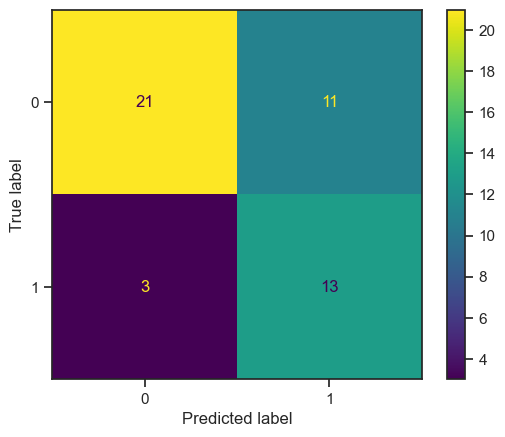

In [42]:
ConfusionMatrixDisplay(confusion_matrix(y_test,predictions)).plot()

In [43]:
print(classification_report(y_test,predictions))

                    precision    recall  f1-score   support

    Tumor Detected       0.88      0.66      0.75        32
Tumor Not Detected       0.54      0.81      0.65        16

          accuracy                           0.71        48
         macro avg       0.71      0.73      0.70        48
      weighted avg       0.76      0.71      0.72        48



In [46]:
import pickle
pickle.dump(pipeline,open('Brain_tumor.pkl','wb'))